# Projet Supply Chain - Satisfaction des clients

**Groupe DS23 :**
- Margaux  ELISSALDE
- Marine   MERLE
- Narcisse TCHAMANI

Notre projet porte sur l'analyse d'une supply chain et donc sur l'ensemble des étapes d'approvisionnement, du processus productif 
et de distribution de la marchandise.

En aval de ce processus, il peut être intéressant d'évaluer la satisfaction des clients : 
- les produits correspondent ils à leurs besoins ?
- si non : quels sont les motifs d'insatisfactions ?
- des retours sont ils faits aux commentaires des clients ? 
- quelles sont les améliorations pouvant être mises en place pour améliorer le processus? 

Notre restitution s'articule autour de quatre grands axes :\
1- Introduction, contexte projet \
2- Collecte de données, préprocessing et visualisation \
3- Modélisation et définition d'algorithmes \
4- Conclusion de la performance des modèles 

## 1. Introduction

### 1.1 Contexte du projet

Dans le groupe, seules Margaux et Marine travaillent - respectivement chez l'Oréal et Eiffage Construction.\
Narcisse est quant à lui étudiant.

Margaux \
L'Oréal est un groupe industriel français de produits cosmétiques qui possède plusieurs marques telles que l'Oréal, Garniel, Mixa ou encore Maybelline. 
Son objectif est de produire des cosmétiques dont les formules doivent être parfaitement adaptées aux besoins clients. 
Mon travail actuel consiste à définir ces formules (chimiques) en fonction des retours faits par le service marketing.
L'Oréal est devenu une entreprise 'Digital First' dont la transition digitale, bien avancée, a permis d’établir une relation privilégiée avec ses consommateurs, afin de répondre à leurs attentes et de créer de nouveaux produits et services.
Ce projet Datascientest s'inscrit donc dans la continuité de mon activité. 

Marine \
Eiffage est l'un des leaders européens du BTP et des concessions qui exerce ses activités au travers de 8 métiers suivants : construction, immobilier, aménagement, routes, génie civil, métal, concessions et énergie. 
La transition digitale est, dans le bâtiment, beaucoup moins avancée que dans d'autre domaine. A l'heure actuelle, Eiffage Construction recueille ses données, les structure.  
Sans que ces données soient chiffrées, la satisfaction clients en livraison de chantier ou encore l'adéquation entre le besoin et les offres immobilières sont malgré tout recherchés.
Ce projet Datascientest pourra donc se décliner dans mon entreprise sur ces thématiques bien précises.

### 1.2 Problématique 

L'analyse de données est une notion nouvelle pour l'ensemble du groupe. \
Aucun d'entre nous ne travaille dans ce domaine. Nous avons donc fait des recherches internet pour affiner les problématiques de performance d'une supply chain et de la satisfaction clients. \
De façon synthétique, les entreprises recherchent généralement à : 
> Pour évaluer la performance 'achats' : 
* dépasser les attentes de leurs clients afin de différencier leurs marques 
* réduire le coût moyen d’opération
* évaluer la fiabilité des fournisseurs 
* réduire le taux de litige et le taux de retards (gestion du lead time)
* identifier le taux d’achats par famille de produits\
> Pour évaluer la performance 'supply chain' :
* optimiser le taux de disponibilité / le taux de stocks
* optimiser le taux de remplissage par véhicule 
* réduire la durée moyenne d’opération 
* réduire le coût du transport sur les ventes 
* garantir un taux élévé de livraison dans les délais

Parmis ces données, toutes ne sont pas récupérables en libre service.
Nous essaierons donc d'obtenir celles accessibles sur internet. 


## 2. Collecte de données, préprocessing et visualisation

Les données que nous avons analysé ont été récupérées sur des sites libres d'accès, en ligne, en faisant du WebScrapping.

Dans un premier temps, nous avons récupéré des données de différents secteurs et notamment dans les domaines de :
* la cosmétique
* le vestimentaire
* l agroalimentaire
* le sport

Chacun a analysé ses données.\
Selon le secteur, les services clients répondent plus au moins aux consommateurs.
Nous avons donc décidé de nous concentrer sur le secteur de la cosmétique - secteur dans lequel les services clients répondent 
le plus et dans lequel travaille Margaux.

### 2.1 Collecte des données

Nous allons scrapper les avis clients, émis sur le site Truspilot, des entreprises : Sephora, Marionnaud, Nocibé et My Origins.

In [5]:
# Import des packages nécessaires

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from bs4 import BeautifulSoup as bs
import requests


In [6]:
import warnings
warnings.filterwarnings('ignore')


#### a) Jeu de données scrappé sur le site Trustpilot - company Sephora

In [7]:
# Scrapping des données sephora

url_base = "https://fr.trustpilot.com/review/www.sephora.com"

company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 19):
    url=f"{url_base}?page={page_number}"
    page=requests.get(url, verify=False)
    soup=bs(page.content, 'lxml')

    for donnees in soup.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :

        company.append('Sephora')

        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)

        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)

        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:])

        #etoile=donnees.find('img') renvoie, à tort, des notes vides ne pouvant pas être converties en 'int'
        #notes.append(etoile['alt'])
        #nous utilisons alors le code suivant:

        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src'])

        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)

        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)

        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])

        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append(np.nan)
        else:
            reponse_sav.append(rep_sav.getText())

        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append(np.nan)
            

In [8]:
# Création du dataframe df_Sephora

df_sephora = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_sephora['notes'] = df_sephora['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_sephora['notes'] = df_sephora['notes'].str.replace('.svg', '')

display(df_sephora.head())


,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Sephora,MARIANNE BAILLEUL,4 avis,03 octobre 2023,1,Conseils maquillages nuls,Conseils maquillages nuls ! un mascara qui fai...,2023-10-04T13:40:17.000Z,NaN,NaN
1,Sephora,valerie Tixier,9 avis,06 décembre 2022,1,Colis non encore reçu après deux…,Colis non encore reçu après deux semaines - il...,2022-12-07T23:23:02.000Z,NaN,NaN
2,Sephora,Suzy B,1 avis,25 mai 2023,5,ACCUEIL AGREABLE ET CHALEUREUX,J'ai été merveilleusement accueillie et consei...,2023-05-26T22:28:26.000Z,NaN,NaN
3,Sephora,Nam Nam,1 avis,20 août 2020,1,Fuyez!,"Mais plus jamais, jamais , jamais!!! Sensé ouv...",2020-08-20T08:34:01.000Z,NaN,NaN
4,Sephora,Claire Desmedt,3 avis,30 mai 2022,1,Toujours pas de remboursement après un…,Toujours pas de remboursement après un mois et...,2022-05-30T13:56:52.000Z,NaN,NaN


#### b)  Jeu de données scrappé sur le site Trustpilot - company Marionnaud

In [9]:
# Scrapping des données Marionnaud

url_base = "https://fr.trustpilot.com/review/www.marionnaud.com"

company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 100):
    url=f"{url_base}?page={page_number}"
    page=requests.get(url, verify=False)
    soup=bs(page.content, 'lxml')

    for donnees in soup.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :

        company.append('Marionnaud')

        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)

        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)

        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:])

        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src'])

        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)

        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)

        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])

        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append(np.nan)
        else:
            reponse_sav.append(rep_sav.getText())

        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append(np.nan)
            

In [10]:
# Création du dataframe df_Marionnaud

df_Marionnaud = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_Marionnaud['notes'] = df_Marionnaud['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_Marionnaud['notes'] = df_Marionnaud['notes'].str.replace('.svg', '')

display(df_Marionnaud.head())


,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Marionnaud,Sabrina Lacourte,1 avis,03 octobre 2023,5,Une eau de parfum envoûtante,J'ai eu l'occasion de tester un échantillon de...,2023-10-12T13:22:57.000Z,"Bonjour Sabrina,Nous vous remercions d’avoir p...",2023-10-12T13:40:28.000Z
1,Marionnaud,Jadounetteagd,2 avis,02 octobre 2023,4,"Sérum parfait pour ma peau, un véritable allié...","Je suis ravi d’avoir découvert ce sérum, il ap...",2023-10-12T17:23:00.000Z,NaN,NaN
2,Marionnaud,Sophie Ymele,2 avis,08 octobre 2023,1,J’ai passé commande avec une offre 2=3,J’ai passé commande avec une offre 2=3 Je n’ai...,2023-10-12T19:07:49.000Z,NaN,NaN
3,Marionnaud,Joey,3 avis,18 septembre 2023,1,Tromperie sur la marchandise! + mauvais SAV,"Bonjour,J’ai passé une commande pour un parfum...",2023-10-12T14:20:27.000Z,"Bonjour Joey,Nous regrettons d'apprendre que v...",2023-10-12T13:41:38.000Z
4,Marionnaud,Samira G.,1 avis,19 septembre 2023,5,Suite commande en ligne,Commande passée très facilement sur le site et...,2023-10-05T13:55:28.000Z,"Bonjour Samira, Nous vous remercions pour ce c...",2023-10-05T14:22:24.000Z


#### c) Jeu de données scrappé sur le site Trustpilot - company Nocibé

In [11]:
# Scrapping des données Nocibé

url_base = "https://fr.trustpilot.com/review/www.nocibe.fr"

company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 60):
    url=f"{url_base}?page={page_number}"
    page=requests.get(url, verify=False)
    soup=bs(page.content, 'lxml')

    for donnees in soup.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :

        company.append('Nocibé')

        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)

        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)

        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:])

        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src'])

        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)

        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)

        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])

        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append(np.nan)
        else:
            reponse_sav.append(rep_sav.getText())

        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append(np.nan)
            

In [12]:
# Création du dataframe df_Nocibé

df_Nocibé = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_Nocibé['notes'] = df_Nocibé['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_Nocibé['notes'] = df_Nocibé['notes'].str.replace('.svg', '')

display(df_Nocibé.head())


,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Nocibé,Berdon,1 avis,09 octobre 2023,1,Après plusieurs commandes sur le colis vide site…,Après plusieurs commandes sur le site où je n'...,2023-10-09T13:58:29.000Z,NaN,NaN
1,Nocibé,Claire Graillot,1 avis,25 septembre 2023,1,service client nul,Je suis furieuse. J'ai commandé mon parfum en ...,2023-09-25T17:02:06.000Z,NaN,NaN
2,Nocibé,marie ziake,1 avis,02 septembre 2023,5,j'aime beaucoup pour ma part,"j'aime beaucoup pour ma part, surtout les prod...",2023-09-28T08:54:19.000Z,NaN,NaN
3,Nocibé,Margareta Albers,5 avis,04 septembre 2023,1,J'ai commandé pour l'anniversaire de ma…,J'ai commandé pour l'anniversaire de ma fille ...,2023-09-19T21:04:21.000Z,NaN,NaN
4,Nocibé,bh yosra,2 avis,25 juillet 2023,1,Plus jamais de commande en ligne !,J'ai passé une commande (pour offrir) en ligne...,2023-09-09T15:47:18.000Z,NaN,NaN


#### d) Jeu de données scrappé sur le site Trustpilot - company My_origins

In [13]:
# Scrapping des données My Origins

url_base = "https://fr.trustpilot.com/review/www.my-origines.com"

company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 200):
    url=f"{url_base}?page={page_number}"
    page=requests.get(url, verify=False)
    soup=bs(page.content, 'lxml')

    for donnees in soup.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :

        company.append('My_origines')

        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)

        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)

        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:])

        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src'])

        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)

        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)

        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])

        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append(np.nan)
        else:
            reponse_sav.append(rep_sav.getText())

        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append(np.nan)
            

In [14]:
# Création du dataframe df_my

df_my= pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_my['notes'] = df_my['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_my['notes'] = df_my['notes'].str.replace('.svg', '')

display(df_my.head())


,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,My_origines,Laurent,6 avis,07 juin 2023,5,MyOriigine très bonne expérience,Commande chez MyOrigine avec une très bonne ex...,2023-10-09T17:16:01.000Z,NaN,NaN
1,My_origines,virginie saura,2 avis,10 octobre 2023,5,Parfum coach,"En ce qui me concerne, colis bien reçu et très...",2023-10-10T21:16:15.000Z,NaN,NaN
2,My_origines,Nadine Emma COHEN,1 avis,11 octobre 2023,5,Très satisfaite !!!,Le produit est arrivé en parfait état en 3 jou...,2023-10-11T16:59:02.000Z,NaN,NaN
3,My_origines,Estelle Meeuws,1 avis,28 septembre 2023,5,Je recommande ++++,"J'ai passé ma commande le 23 septembre 23 , li...",2023-09-28T19:16:47.000Z,NaN,NaN
4,My_origines,Jean-Paul Fromweiler,1 avis,21 septembre 2023,5,"Site fiable...""A consommer sans modération!""",J'ai déjà fait plusieurs commandes sur ce site...,2023-09-27T16:35:20.000Z,NaN,NaN


#### e) Fusion des dataframes 

In [15]:
dataframes = [df_sephora, df_Marionnaud, df_Nocibé, df_my]
df = pd.concat(dataframes)
df.head(10)


,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Sephora,MARIANNE BAILLEUL,4 avis,03 octobre 2023,1,Conseils maquillages nuls,Conseils maquillages nuls ! un mascara qui fai...,2023-10-04T13:40:17.000Z,NaN,NaN
1,Sephora,valerie Tixier,9 avis,06 décembre 2022,1,Colis non encore reçu après deux…,Colis non encore reçu après deux semaines - il...,2022-12-07T23:23:02.000Z,NaN,NaN
2,Sephora,Suzy B,1 avis,25 mai 2023,5,ACCUEIL AGREABLE ET CHALEUREUX,J'ai été merveilleusement accueillie et consei...,2023-05-26T22:28:26.000Z,NaN,NaN
3,Sephora,Nam Nam,1 avis,20 août 2020,1,Fuyez!,"Mais plus jamais, jamais , jamais!!! Sensé ouv...",2020-08-20T08:34:01.000Z,NaN,NaN
4,Sephora,Claire Desmedt,3 avis,30 mai 2022,1,Toujours pas de remboursement après un…,Toujours pas de remboursement après un mois et...,2022-05-30T13:56:52.000Z,NaN,NaN
5,Sephora,Bettach,3 avis,15 février 2021,1,Très mauvaise expérience,Très mauvaise expérience. Un SAV inutile qui n...,2021-02-15T18:06:28.000Z,NaN,NaN
6,Sephora,Consumer,1 avis,07 février 2022,1,Passage Séphora galerie Carrefour à Thionville,"Bonjour , Ma copine et moi sommes passés Samed...",2022-02-07T12:10:44.000Z,NaN,NaN
7,Sephora,Stephane Jeanmart,2 avis,29 novembre 2022,1,J'ai commandé un parfum chez Séphora,J'ai commandé un parfum chez Séphora le mois d...,2022-12-01T02:51:12.000Z,NaN,NaN
8,Sephora,Marie S C,5 avis,15 décembre 2020,1,Absolument aucun service clients.,Absolument aucun service clients.J'y ai acheté...,2020-12-15T12:23:30.000Z,NaN,NaN
9,Sephora,Huber,6 avis,08 octobre 2019,1,2 semaines que j'attend ma commande ..,2 semaines que j'attend ma commande ... Servic...,2019-10-08T15:04:57.000Z,NaN,NaN


In [16]:
# afin de ne pas avoir à refaire tourner le webscrapping, nous extrayons un fichier .csv
df.to_csv('Compilation webscrapping cosmetique.csv', index=False)

In [17]:
# on reprend le code à partir de cette ligne pour les prochaines fois

df=pd.read_csv('Compilation webscrapping cosmetique.csv')

In [18]:
df.head()

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Sephora,MARIANNE BAILLEUL,4 avis,03 octobre 2023,1,Conseils maquillages nuls,Conseils maquillages nuls ! un mascara qui fai...,2023-10-04T13:40:17.000Z,NaN,NaN
1,Sephora,valerie Tixier,9 avis,06 décembre 2022,1,Colis non encore reçu après deux…,Colis non encore reçu après deux semaines - il...,2022-12-07T23:23:02.000Z,NaN,NaN
2,Sephora,Suzy B,1 avis,25 mai 2023,5,ACCUEIL AGREABLE ET CHALEUREUX,J'ai été merveilleusement accueillie et consei...,2023-05-26T22:28:26.000Z,NaN,NaN
3,Sephora,Nam Nam,1 avis,20 août 2020,1,Fuyez!,"Mais plus jamais, jamais , jamais!!! Sensé ouv...",2020-08-20T08:34:01.000Z,NaN,NaN
4,Sephora,Claire Desmedt,3 avis,30 mai 2022,1,Toujours pas de remboursement après un…,Toujours pas de remboursement après un mois et...,2022-05-30T13:56:52.000Z,NaN,NaN


### 2.2 Exploration des données

**Analyse des variables**

Le dataframe réalisé est composé des variables suivantes :
- company : l'entreprise dans laquelle les clients ont achété leurs produits
- client : nom / pseudo du client ayant acheté dans la company
- nb_avis_client : nombre d'avis du client émis sur la plateforme d'avis Trustpilot
- date_commande : date de l'expérience d'achat
- notes : nombre d'étoiles mis par le client pour son achat
- titre_commentaire : mot clef résumant le commentaire
- commentaire : commentaire du client détaillant son achat
- date_commentaire : date à laquelle le commentaire a été écrit sur le site (Trustpilot)
- reponse_sav : date à laquelle le service SAV a répondu au commentaire du client (en cas d'absence de retour : NaN)
- annee_commande : année de l'expérience d'achat du client

**Analyse du type des variables**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6313 entries, 0 to 6312
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   company            6313 non-null   object
 1   client             6313 non-null   object
 2   nb_avis_client     6313 non-null   object
 3   date_commande      6313 non-null   object
 4   notes              6313 non-null   int64 
 5   titre_commentaire  6313 non-null   object
 6   commentaire        6313 non-null   object
 7   date_commentaire   6313 non-null   object
 8   reponse_sav        2271 non-null   object
 9   date_reponse_sav   2271 non-null   object
dtypes: int64(1), object(9)
memory usage: 493.3+ KB


Notre jeu de données est composé de 1432 avis clients.

Seules les variables 'reponse_sav' et 'date_reponse_sav' comportent des valeurs manquantes. 
Nous n'allons cependant pas les supprimer car le taux de réponse peut potentiellement impacter les avis clients.

Toutes les variables sont cependant de type 'object'. Cela doit être corrigé si l'on souhaite manipuler nos données.
* nb_avis_client, note doivent être corrigés en type 'int'
* date_commentaire, date_reponse_sav doivent être corrigées en type 'datetime'

In [20]:
# transformation du type de la note

df['notes']=df['notes'].astype('int')


In [21]:
# transformation du nombre d'avis par client en nombre puis de son type en 'int'

df["nb_avis_client"] = df["nb_avis_client"].apply(lambda x: x.split()[0]).astype(int)


In [22]:
# transformation du format de date de commande et de son type en datetime

df['date_commande'] = pd.to_datetime(df['date_commande'], format='%d %B %Y')


ValueError: time data '03 octobre 2023' does not match format '%d %B %Y' (match)

In [23]:
# transformation du format de date de commentaire et de son type en datetime

df['date_commentaire'] = pd.to_datetime(df['date_commentaire'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [24]:
# transformation du format de date de réponse du sav et de son type en datetime

df['date_reponse_sav'] = pd.to_datetime(df['date_reponse_sav'])

In [25]:
# on vérifie que les changements aient bien été effectués

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6313 entries, 0 to 6312
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   company            6313 non-null   object             
 1   client             6313 non-null   object             
 2   nb_avis_client     6313 non-null   int32              
 3   date_commande      6313 non-null   object             
 4   notes              6313 non-null   int32              
 5   titre_commentaire  6313 non-null   object             
 6   commentaire        6313 non-null   object             
 7   date_commentaire   6313 non-null   datetime64[ns]     
 8   reponse_sav        2271 non-null   object             
 9   date_reponse_sav   2271 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int32(2), object(6)
memory usage: 444.0+ KB


In [26]:
# les formats des date_commentaire et date_reponse_sav ne sont pas les mêmes et ne peuvent pas être manipulées
# nous souhaitons en effet faire la différence afin de connaitre le délai de réponse
# nous devons les reconvertir au meme format

import pytz
df['date_commentaire'] = df['date_commentaire'].dt.tz_localize(pytz.UTC)

In [27]:
# on calcule et on crée une colonne délai de réponse afin de pouvoir visualiser le délai de retour du SAV
# et essayer de savoir s'il y a une corrélation entre les retours SAV et la note mis à une entreprise

df['delai_reponse'] = df['date_reponse_sav'] - df['date_commentaire']

In [28]:
# on vérifie la création de la colonne délai_reponse

df.head()

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav,delai_reponse
0,Sephora,MARIANNE BAILLEUL,4,03 octobre 2023,1,Conseils maquillages nuls,Conseils maquillages nuls ! un mascara qui fai...,2023-10-04 13:40:17+00:00,NaN,NaT,NaT
1,Sephora,valerie Tixier,9,06 décembre 2022,1,Colis non encore reçu après deux…,Colis non encore reçu après deux semaines - il...,2022-12-07 23:23:02+00:00,NaN,NaT,NaT
2,Sephora,Suzy B,1,25 mai 2023,5,ACCUEIL AGREABLE ET CHALEUREUX,J'ai été merveilleusement accueillie et consei...,2023-05-26 22:28:26+00:00,NaN,NaT,NaT
3,Sephora,Nam Nam,1,20 août 2020,1,Fuyez!,"Mais plus jamais, jamais , jamais!!! Sensé ouv...",2020-08-20 08:34:01+00:00,NaN,NaT,NaT
4,Sephora,Claire Desmedt,3,30 mai 2022,1,Toujours pas de remboursement après un…,Toujours pas de remboursement après un mois et...,2022-05-30 13:56:52+00:00,NaN,NaT,NaT


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


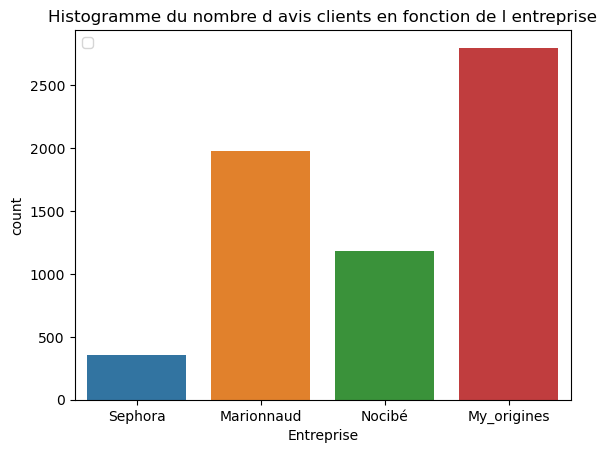

In [29]:
# Analyse de la distribution du nombre d'avis par entreprises

sns.countplot(x="company", data=df);
plt.xlabel('Entreprise')
plt.legend()
plt.title('Histogramme du nombre d avis clients en fonction de l entreprise');

# dans un 1er temps, ayant scrappé le même nombre de page (contenant le même nombre de commentaires), nous avons autant
# de données pour toutes les entreprises - nous n'avons pas nécessité de normaliser nos données


In [30]:
# autre méthodes avec un value_counts

df['company'].value_counts()


My_origines    2800
Marionnaud     1980
Nocibé         1180
Sephora         353
Name: company, dtype: int64

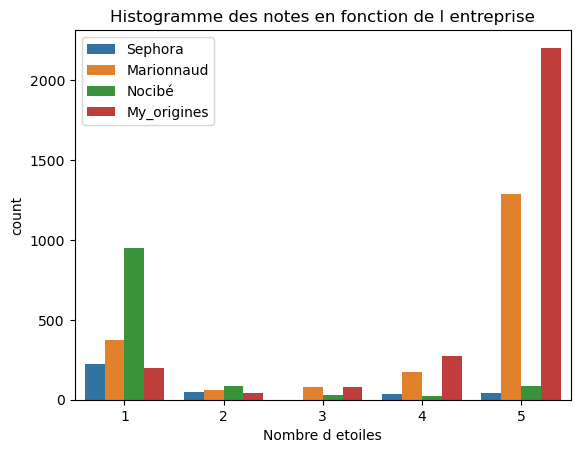

In [31]:
# Analyse de la distribution du nombre d'étoiles par entreprises

sns.countplot(x="notes", hue='company', data=df)
plt.xlabel('Nombre d etoiles')
plt.legend()
plt.title('Histogramme des notes en fonction de l entreprise');

# ce graphique nous permet de voir
# de façon générale que les clients sont extrêmes dans leurs notations et mettent soit une très bonne note (5) soit une très 
# mauvaise (1) mais il n'y a pas d'entre deux
# Sephora et Nocibé sont est assez mal nôtés, contrairement à My Origins et Marionnaud qui ont de très bonnes notes
# Il serait donc intéressant de savoir ce qui différencie ces entreprises.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


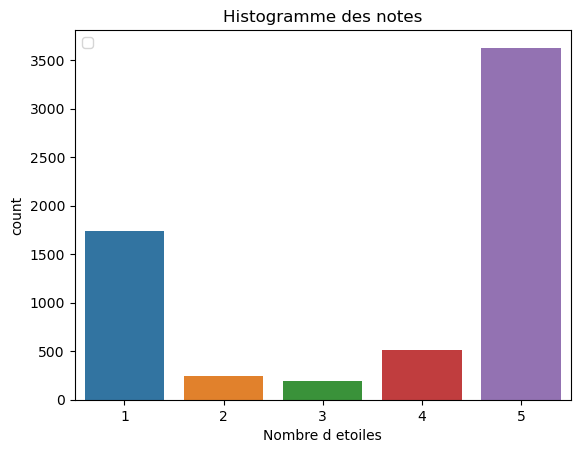

In [32]:
# Analyse de la distribution du nombre d'étoiles sans tenir compte de l entreprises

sns.countplot(x="notes", data=df)
plt.xlabel('Nombre d etoiles')
plt.legend()
plt.title('Histogramme des notes');


In [33]:
print("Le pourcentage de répartition des étoiles est de : ", df["notes"].value_counts(normalize = True)*100)

Le pourcentage de répartition des étoiles est de :  5    57.452875
1    27.609694
4     8.078568
2     3.833360
3     3.025503
Name: notes, dtype: float64


In [34]:
# Visualisation des 20 clients déposant le plus de commentaires 

top_20 = df.nlargest(20, 'nb_avis_client')
print(top_20[['company', 'client', 'nb_avis_client', 'notes']])

# on remarque qu'une cliente (Marlène Santin) est particulièrement active sur Trustpilot
# la colonne 'nb_avis_client' ne semble cependant pas pertinente. 
# en effet, si une cliente fait de nombreux achats sur un meme site et note chacune de ses commandes, son nom revient plusieurs 
# fois
# le nb_avis_client est de plus calculé sur l'ensemble du site Trustpilot et non pour l'entreprise visée 
# (ex: Nocibé dans le cas de Marlène). Nous ne poursuivrons donc pas l'analyse de cette variable.


          company              client  nb_avis_client  notes
2614       Nocibé      Marlène Santin             289      5
3511       Nocibé                  Fa              85      5
2619       Nocibé                Salb              79      1
4475  My_origines             Sabrina              79      3
1340   Marionnaud            Nathalie              78      4
3027       Nocibé                  CC              78      1
2280   Marionnaud  Philippe Bouteloup              76      4
3282       Nocibé              klugii              65      1
3694  My_origines               Wafad              64      2
972    Marionnaud              Djamel              58      5
1855   Marionnaud               Sonia              58      5
5152  My_origines   Madame BONUCCELLI              57      5
1741   Marionnaud              Carole              56      5
608    Marionnaud            Brynie92              55      3
1417   Marionnaud              delp77              55      5
2810       Nocibé       

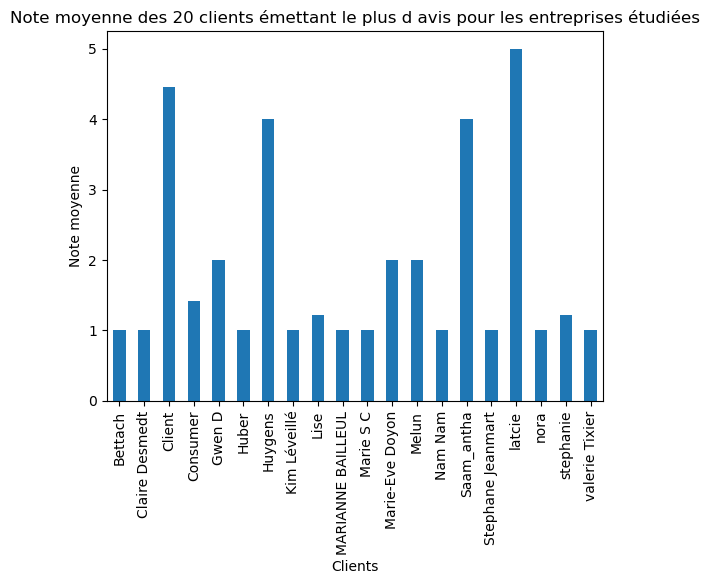

In [35]:
# nous allons cependant analyser le nom des clients revenant le plus fréquemment dans notre dataframe
# qui correspond aux clients les plus actifs (qui mettent le plus de commentaires) pour notre secteur d'étude

top_clients = df['client'].value_counts().nlargest(20)
top_clients_df = df[df['client'].isin(top_clients.index)]

moyenne_notes_top_clients = top_clients_df.groupby('client')['notes'].mean()

moyenne_notes_top_clients.plot(kind='bar')

plt.xlabel('Clients')
plt.ylabel('Note moyenne')
plt.title('Note moyenne des 20 clients émettant le plus d avis pour les entreprises étudiées')

plt.show()

# la majorité des clients qui mettent le plus de commentaires émettent de mauvaises notes (1)


In [36]:
# évolution de la moyenne d'étoiles par an

df['annee_commande'] = df['date_commande'].dt.year
df['annee_commande'] = pd.to_datetime(df['annee_commande'], format='%Y')

moyennes = df.groupby(["annee_commande", "company"])["notes"].mean().reset_index()
entreprises = moyennes['company'].unique()


fig, ax = plt.subplots()

for entreprise in entreprises:
    data = moyennes[moyennes['company'] == entreprise]
    ax.plot(data['annee_commande'], data['notes'], label=entreprise, marker='o')

ax.legend()

ax.set_xlabel('Année')
ax.set_ylabel('Moyenne des Notes')
ax.set_title("Évolution des notes moyennes par entreprises");


"""

Notre 1er scrapping était réalisé sur les 20ères pages de chaque entreprise. 
Sur ces 20 pages, nous obtenions des données pour sephora remontant jusqu'en 2012. 
En revanche pour les autres entreprises (et notamment pour my origins), les données des 20ères pages étaient très récentes
Nous avons étendu notre scrapping des pages de ces sites afin de voir l'évolution des différentes variables.
Les données de My_Origines restent malgré tout très récentes

Nous observons que :
- la note moyenne mise à sephora a fortement baissé entre 2012 et 2022
- la note moyenne mise à Nocibé semble constante entre 2016 et 2022
- les notes moyennes de Marionnaud, My Origins et Sephora sont fortement remontées entre 2022 et 2023

"""


AttributeError: Can only use .dt accessor with datetimelike values

In [37]:
# on calcule le délai moyen de retour du SAV par entreprise et par année

delai = df.groupby([df['annee_commande'].dt.year, 'company'])['delai_reponse'].mean().reset_index()
delai.rename(columns={'annee_commande': 'Année de commande'}, inplace=True)


# on visualise ensuite l'évolution du délai de réponse par entreprise
# les retours étant relativement récents, nous limitons notre visualisation entre 2020 et 2023

plt.figure(figsize=(12, 6))
sns.lineplot(x='Année de commande', y='delai_reponse', hue='company', data=result)
plt.title('Évolution du délai moyen de réponse par année de commande et entreprise')
plt.xlabel('Année de commande')
plt.ylabel('Délai moyen de réponse')
plt.xticks([int(year) for year in result['Année de commande']], rotation=45)
plt.xlim(2020, 2023)
plt.legend(title='Entreprise', loc='upper right')
plt.show()

"""
On observe cependant qu'entre 2022 et 2023 :
- que Marionnaud et My_Origins, les entreprises les mieux notées, répondent plus vite aux avis clients 
- Nocibé met plus de temps à répondre
- Séphora ne répond pas...
"""


KeyError: 'annee_commande'

### 2.3 Text mining

Nous allons maintenant essayer de déterminer le sentiment général qui se dégage des commentaires. 

In [38]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


In [39]:
# Initialisation de la variable des mots vides

stop_words = set(stopwords.words('french'))
print(stop_words)


{'aie', 'l', 'le', 'soyons', 'les', 'aux', 'sois', 'seriez', 'ayantes', 'étaient', 'avions', 'avec', 'serez', 'tes', 'ils', 'était', 'ce', 'furent', 'eusse', 'fussiez', 'est', 'n', 'ayez', 'eurent', 'de', 'aurait', 'je', 'es', 'fut', 'soyez', 'auront', 'serais', 't', 'fûtes', 'sur', 'fussions', 'aies', 'eût', 'il', 'toi', 'des', 'fus', 'à', 'au', 'même', 'sa', 'ton', 'eux', 'fussent', 'fusses', 'sera', 'te', 'dans', 'ces', 'eue', 'eussions', 'vos', 'qui', 'sont', 'ne', 'serions', 'étée', 'moi', 'aurions', 'tu', 'notre', 'suis', 'seraient', 'eussent', 'ayons', 'eues', 'as', 'mon', 'j', 'y', 'ses', 'serai', 'été', 'ou', 'ta', 'étantes', 'ai', 'se', 'aurez', 'vous', 'ont', 'eusses', 'avaient', 'en', 'd', 'seront', 'aurai', 'auraient', 'aurais', 'ayants', 'eu', 'fûmes', 'aient', 'nos', 'elle', 'avais', 'avait', 'étions', 'auras', 'sommes', 'ayante', 'ait', 's', 'aurons', 'eut', 'son', 'aura', 'pas', 'serons', 'avez', 'étant', 'm', 'eus', 'soit', 'la', 'mes', 'fût', 'aviez', 'eûmes', 'étais

In [40]:
# Mise à jour la valeur de stop_words 

mots = ["parfum", "produit", "Nocibé", "commande", "site", "très","plus", "c'est", "donc", "a", "car", "qu'il", "qu'elle",
        "dit", "fait", "Nocibe", "Sephora", "Marionnaud", "?", "!", ".", ",", ":", ";", "-", "--", "...",'"', "'","j'ai", "faire", "dire" ]
stop_words.update(mots)


In [41]:
# Définition de fonction renvoyant la liste des commentaires négatifs ou positifs d'une entreprise donnée 

def liste_commentaires(df, company, notes):
    commentaires_filtres = df[(df["company"]==company) & (df["notes"]== notes)]
    commentaires = commentaires_filtres["commentaire"].tolist()
    text = ''.join(commentaires)
    return text

def liste_titre_commentaire(df, company, notes):
    titre_commentaire_filtres = df[(df["company"]==company) & (df["notes"]== notes)]
    titre_commentaires = titre_commentaire_filtres["titre_commentaire"].tolist()
    text = ''.join(titre_commentaires)
    return text


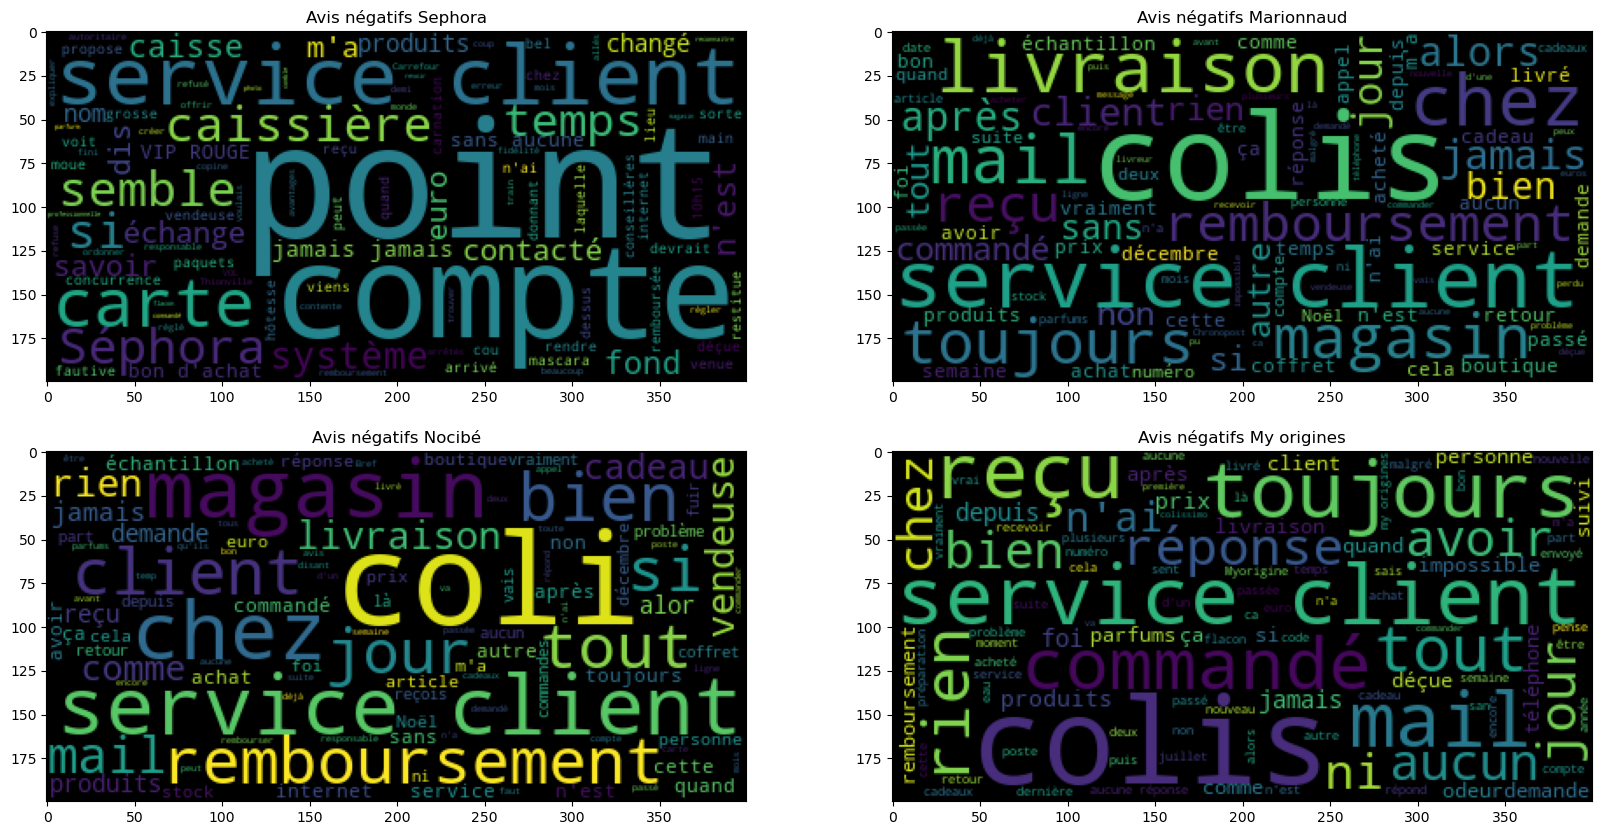

In [42]:
# Définition des wordcloud négatifs (notes égales à 1) de chacune des entreprises 

wc = WordCloud(background_color = "black", max_words = 100, stopwords = stop_words)
plt.figure(figsize=(20,10))

plt.subplot(221)
wc.generate(liste_commentaires(df, "Sephora", 1))
plt.title("Avis négatifs Sephora")
plt.imshow(wc)

plt.subplot(222)
wc.generate(liste_commentaires(df, "Marionnaud", 1))
plt.title("Avis négatifs Marionnaud")
plt.imshow(wc)

plt.subplot(223)
wc.generate(liste_commentaires(df, "Nocibé", 1))
plt.title("Avis négatifs Nocibé")
plt.imshow(wc)

plt.subplot(224)
wc.generate(liste_commentaires(df, "My_origines", 1))
plt.title("Avis négatifs My origines")
plt.imshow(wc);


Le mot "service client" revient souvent dans les commentaires négatifs. 
A chaque réclamation, le service client est sollicité. Il est donc compliqué de savoir si le service client a été sollicité
pour le problème en question ou si le service client est défaillant. 

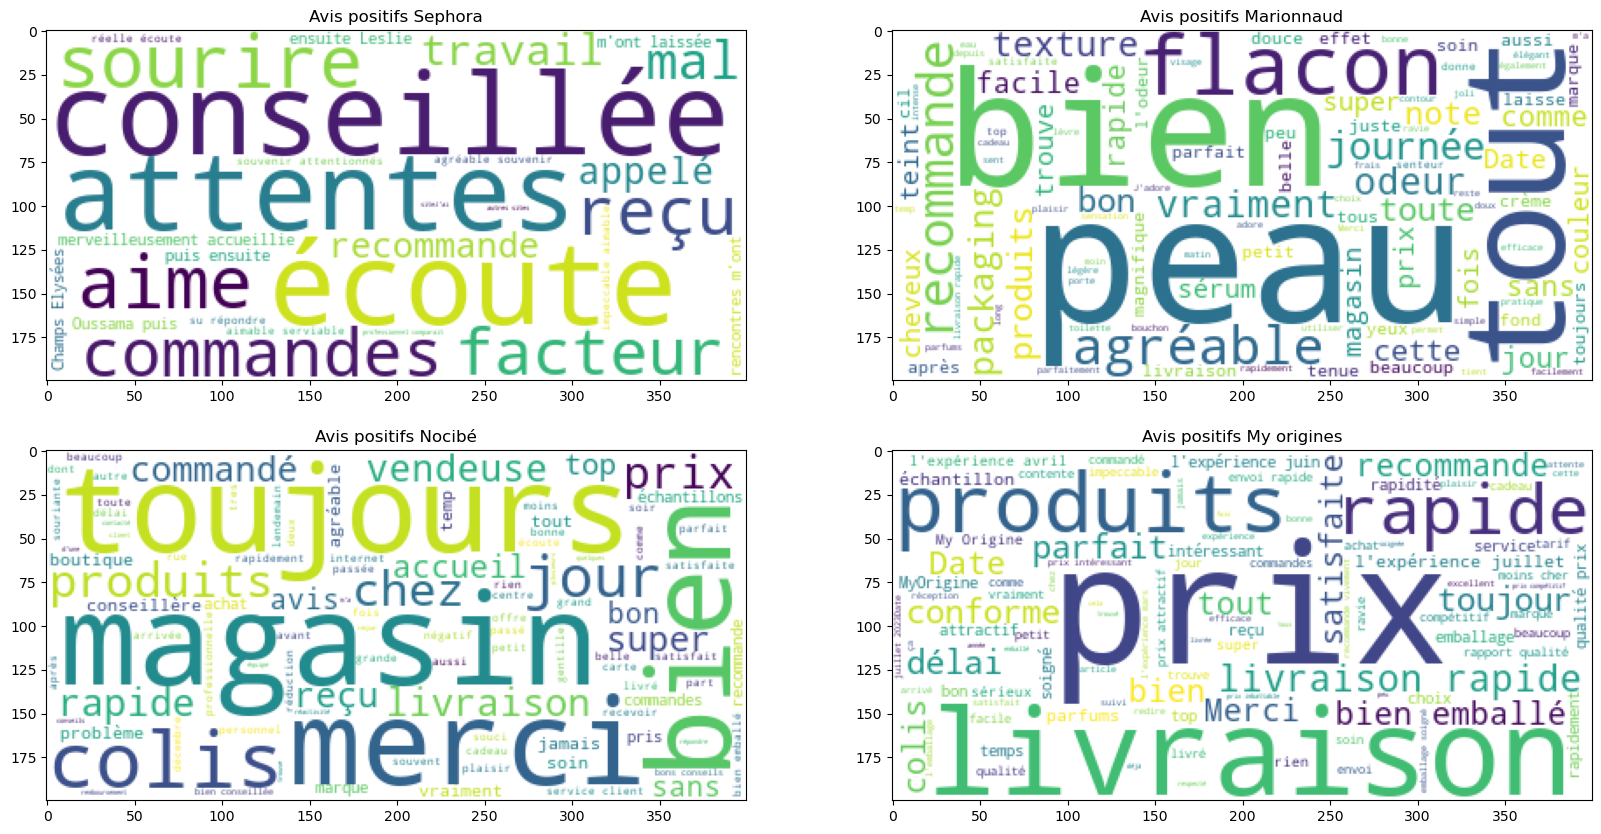

In [43]:
# Définition des wordcloud positifs (notes égales à 5) de chacune des entreprises 

wc = WordCloud(background_color = "white", max_words = 100, stopwords = stop_words)
plt.figure(figsize=(20,10))

plt.subplot(221)
wc.generate(liste_commentaires(df, "Sephora", 5))
plt.title("Avis positifs Sephora")
plt.imshow(wc)

plt.subplot(222)
wc.generate(liste_commentaires(df, "Marionnaud", 5))
plt.title("Avis positifs Marionnaud")
plt.imshow(wc)

plt.subplot(223)
wc.generate(liste_commentaires(df, "Nocibé", 5))
plt.title("Avis positifs Nocibé")
plt.imshow(wc)

plt.subplot(224)
wc.generate(liste_commentaires(df, "My_origines", 5))
plt.title("Avis positifs My origines")
plt.imshow(wc);


Contrairement aux avis négatifs, aucun point commun ne semble se dégager pour les commentaires positifs
* Pour Séphora - les vendeur/euses, leurs conseils, leurs attitudes semblent être appréciés
* Pour Marionnaud - le packaging, les flacons, la qualité des produits est mise en avant
* Pour Nocibé - aucun champ lexical ciblé ne ressort du wordcloud
* Pour My Origines (site de vente en ligne uniquement) - la rapidité, la conformité des produits, la livraison semblent satisfaire les clients

In [44]:
# Séparer df en catégories : très mauvais, mauvais, moyen, bon, très bon

df_Tmauvais = df[df.notes == 1]
df_mauvais = df[df.notes == 2]
df_moyen = df[df.notes == 3]
df_bon = df[df.notes == 4]
df_Tbon = df[df.notes == 5]


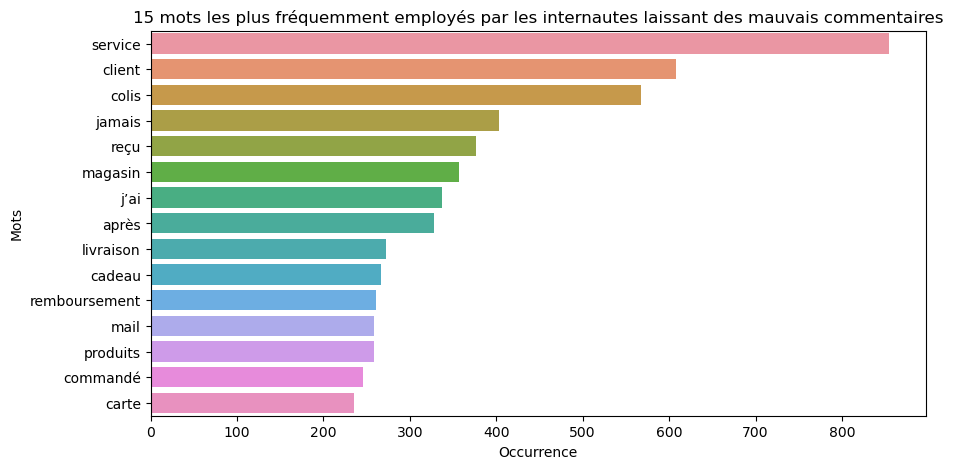

In [45]:
# on définie et on on complète notre stop_words
stop_words = set(stopwords.words('french'))

mots_vide_sens = ["parfum", "produit", "Nocibé", "commande", "site", "très", "plus", "c'est", "donc", "a", "car", "qu'il", "qu'elle",
        "dit", "fait", "Nocibe", "Sephora", "Marionnaud", "?", "!", ".", ",", ":", ";", "-", "--", "...",'"', "'","j'ai", "faire", 
                  "chez", "si", "tout", "nocibé", "rien", "fois", "dire", "cette", "sans", "nocibe", "comme", "alors", 
                  "aucune", "j' ai","bien", "toujours", "2", "aucun", "n'est", "être"]

stop_words.update(mots_vide_sens)

# on filtrer les mots vides de sens des commentaires
def filtrer_commentaires(texte):
    mots = texte.split()
    return [mot.lower() for mot in mots if mot.lower() not in stop_words]

# on applique le filtre à tous nos mauvais commentaires
df_Tmauvais['commentaire_filtre'] = df_Tmauvais['commentaire'].apply(filtrer_commentaires)

# on crée une chaine des mots retournés
chaine = ' '.join(' '.join(commentaire) for commentaire in df_Tmauvais['commentaire_filtre'])

# on compte la fréquence des mots les plus récurrents des plus mauvais commentaires
dico = Counter(chaine.split())

# on sélectionne les 15 les plus fréquents
mots = [mot[0] for mot in dico.most_common(15)]
freq = [mot[1] for mot in dico.most_common(15)]

# puis on trace l'histogramme
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=freq, y=mots, orient='h')  # Inversez l'orientation pour un histogramme horizontal
plt.title("15 mots les plus fréquemment employés par les internautes laissant des mauvais commentaires")
plt.xlabel('Occurrence')
plt.ylabel('Mots');


## 3. Modélisation et définition d'algorithmes sur jeu de données réduit brut

L'objectif est désormais de construire un modèle simple de Machine Learning pour prédire une note à partir de commentaires.

* Variable explicative: commentaires
* Variable à prédire : notes

Nous essaierons plusieurs algorithmes. 
En préambule, notre jeu de données étant conséquents et les algorithmes prenant du temps à tourner, nous allons réduire notre dataset (proportionnellement aux notes émises par les clients).

In [46]:
# on élimine d'abord le nom des marques de commentaires car ce dernier influe les prédictions de notes

liste_marques = ["Nocibé", "Nocibe", "nocibe", "Sephora","Séphora", "sephora", "Marionnaud", "marionnaud","my origns",
                 "My Origns", "My Origines"]
for marque in liste_marques:
    df['commentaire'] = df['commentaire'].str.replace(marque, '', case=False)
    
# le séphora en ligne 5 a bien été supprimé de 'commentaire' mais persiste dans le 'titre du commentaire' que nous 
# n'utilisons pas


In [47]:
df.head()

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav,delai_reponse
0,Sephora,MARIANNE BAILLEUL,4,03 octobre 2023,1,Conseils maquillages nuls,Conseils maquillages nuls ! un mascara qui fai...,2023-10-04 13:40:17+00:00,NaN,NaT,NaT
1,Sephora,valerie Tixier,9,06 décembre 2022,1,Colis non encore reçu après deux…,Colis non encore reçu après deux semaines - il...,2022-12-07 23:23:02+00:00,NaN,NaT,NaT
2,Sephora,Suzy B,1,25 mai 2023,5,ACCUEIL AGREABLE ET CHALEUREUX,J'ai été merveilleusement accueillie et consei...,2023-05-26 22:28:26+00:00,NaN,NaT,NaT
3,Sephora,Nam Nam,1,20 août 2020,1,Fuyez!,"Mais plus jamais, jamais , jamais!!! Sensé ouv...",2020-08-20 08:34:01+00:00,NaN,NaT,NaT
4,Sephora,Claire Desmedt,3,30 mai 2022,1,Toujours pas de remboursement après un…,Toujours pas de remboursement après un mois et...,2022-05-30 13:56:52+00:00,NaN,NaT,NaT


In [48]:
"""
Pour mémoire
Le pourcentage de répartition des étoiles est de :  notes
5    58.088235
1    26.720901
4     8.307259
2     3.817272
3     3.066333
"""

# nous allons sélectionner ~2000 données au total (dans un premier temps ) soit
# 1162 notes 5; 536 notes 1; 166 notes 4; 76 notes 2; 60 notes 3

notes_5 = df[df['notes'] == 5].sample(n=1162, random_state=42)
notes_1 = df[df['notes'] == 1].sample(n=536, random_state=42)
notes_4 = df[df['notes'] == 4].sample(n=166, random_state=42)
notes_2 = df[df['notes'] == 2].sample(n=76, random_state=42)
notes_3 = df[df['notes'] == 3].sample(n=60, random_state=42)

# on appelle df_reduit notre dataframe avec moins de données
df_reduit = pd.concat([notes_5, notes_1, notes_4, notes_2, notes_3])


In [49]:
df_reduit.head()

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav,delai_reponse
1270,Marionnaud,chrisross,5,04 décembre 2022,5,Absolument parfait,"Absolument parfait. Prise de commande, délais,...",2022-12-17 14:13:15+00:00,"Bonjour,Nous vous remercions pour ce partage e...",2022-12-20 09:24:20+00:00,2 days 19:11:05
4064,My_origines,CLAIRE MUNNIER,1,17 juillet 2023,5,Livraison rapide et emballage soigné.,Date de l'expérience: 17 juillet 2023,2023-07-20 15:03:33+00:00,NaN,NaT,NaT
4799,My_origines,Monsieur REVY,9,10 juin 2023,5,Toujours livré en temps et en heure,Toujours livré en temps et en heure. Merci !..,2023-06-20 16:09:40+00:00,NaN,NaT,NaT
5769,My_origines,Karine H.,1,23 mars 2023,5,"des bons produits, un bon service","des bons produits, de bons prix, et une expédi...",2023-03-28 14:04:54+00:00,NaN,NaT,NaT
4922,My_origines,M. TOK,2,06 juin 2023,5,Livraison rapide,"Livraison rapide, et produit conforme",2023-06-13 14:35:49+00:00,NaN,NaT,NaT


### 3.1 Gradient Boosting Classifier

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# On ne garde de notre dataframe que les commentaires (variable explicative) et les notes (variable à prédire)
X, y = df_reduit.commentaire, df_reduit.notes

# Séparation des données d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Définition de l'objet CountVectorizer() et du GradientBoostingClassifier()
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [51]:
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

# Prédiction sur les valeurs test
y_pred_gb = clf_gb.predict(X_test)




In [52]:
from sklearn.metrics import classification_report

# Calcul et affichage de classification_report
print( classification_report(y_test, y_pred_gb) )


              precision    recall  f1-score   support

           1       0.70      0.74      0.72        96
           2       0.33      0.08      0.12        13
           3       0.00      0.00      0.00        17
           4       0.60      0.20      0.30        30
           5       0.82      0.95      0.88       244

    accuracy                           0.77       400
   macro avg       0.49      0.39      0.40       400
weighted avg       0.72      0.77      0.73       400



In [53]:
# Calcul et affichage de la matrice de confusion
confusion_matrix = pd.crosstab(y_test, y_pred_gb, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(confusion_matrix)

"""
Les notes extrêmes semblent être mieux prédites que les notes intermédiaires : 2, 3, 4.

"""


Classe prédite   1  2  3  4    5
Classe réelle                   
1               71  1  3  0   21
2                7  1  0  1    4
3                8  0  0  0    9
4                7  0  0  6   17
5                9  1  0  3  231


'\nLes notes extrêmes semblent être mieux prédites que les notes intermédiaires : 2, 3, 4.\n\n'

In [54]:
# Essai sur quelque avis 

avis = ["Nocibé est une mauvaise marque; les produits ne sont pas qualitatifs", 
        "J'apprécie beaucoup my origins. Bien que le site soit en ligne, ils sont très réactifs."]

tokenized_comments = vectorizer.transform(avis)

clf_gb.predict(tokenized_comments.toarray())


array([1, 5])

In [55]:
#SMOTE
#3.1 Gradient Boosting Classifier

from imblearn.over_sampling import SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)

In [56]:
clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_sm, y_sm)

# Prédiction sur les valeurs test
y_pred_gb = clf_gb.predict(X_test)

In [57]:
clf_gb.score(X_sm, y_sm)

0.8013071895424837

In [58]:
from sklearn.metrics import classification_report

# Calcul et affichage de classification_report
print( classification_report(y_test, y_pred_gb) )

              precision    recall  f1-score   support

           1       0.72      0.74      0.73        96
           2       0.07      0.08      0.07        13
           3       0.12      0.12      0.12        17
           4       0.19      0.37      0.25        30
           5       0.90      0.79      0.84       244

    accuracy                           0.69       400
   macro avg       0.40      0.42      0.40       400
weighted avg       0.74      0.69      0.71       400



### 3.2 Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_jobs=-1, random_state=321).fit(X_train, y_train)

# Prédiction sur les valeurs test
y_pred_rf = clf_rf.predict(X_test)


In [60]:
# Calcul et affichage de classification_report
print( classification_report(y_test, y_pred_rf) )


              precision    recall  f1-score   support

           1       0.78      0.79      0.79        96
           2       0.67      0.15      0.25        13
           3       0.00      0.00      0.00        17
           4       1.00      0.13      0.24        30
           5       0.80      0.97      0.88       244

    accuracy                           0.80       400
   macro avg       0.65      0.41      0.43       400
weighted avg       0.77      0.80      0.75       400



In [61]:
# Calcul et affichage de la matrice de confusion
confusion_matrix = pd.crosstab(y_test, y_pred_rf, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(confusion_matrix)

"""
Le constat est identique sur les notes intermédiaires : 2, 3, 4.

"""


Classe prédite   1  2  4    5
Classe réelle                
1               76  0  0   20
2                8  2  0    3
3                5  0  0   12
4                2  0  4   24
5                6  1  0  237


'\nLe constat est identique sur les notes intermédiaires : 2, 3, 4.\n\n'

In [62]:
# Essai sur quelque avis 

avis = ["Je suis mécontente par le service proposé par My Origins.", "En revanche, je trouve les produits Sephora très qualitatifs."]

tokenized_comments = vectorizer.transform(avis)

clf_rf.predict(tokenized_comments.toarray())


array([5, 5])

In [63]:
#smote
#3.2 Random Forest

from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_jobs=-1, random_state=321).fit(X_sm, y_sm)

# Prédiction sur les valeurs test
y_pred_rf = clf_rf.predict(X_test)


In [64]:
# Calcul et affichage de classification_report
print( classification_report(y_test, y_pred_rf) )


              precision    recall  f1-score   support

           1       0.73      0.92      0.81        96
           2       0.22      0.15      0.18        13
           3       0.17      0.06      0.09        17
           4       0.24      0.27      0.25        30
           5       0.89      0.84      0.86       244

    accuracy                           0.76       400
   macro avg       0.45      0.45      0.44       400
weighted avg       0.75      0.76      0.75       400



In [65]:
# Calcul et affichage de la matrice de confusion
confusion_matrix = pd.crosstab(y_test, y_pred_rf, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(confusion_matrix)

"""
Le constat est identique sur les notes intermédiaires : 2, 3, 4.

"""


Classe prédite   1  2  3   4    5
Classe réelle                    
1               88  2  0   2    4
2                9  2  0   2    0
3                7  3  1   1    5
4                4  0  1   8   17
5               13  2  4  20  205


'\nLe constat est identique sur les notes intermédiaires : 2, 3, 4.\n\n'

In [66]:
# Essai sur quelque avis 

avis = ["Je suis mécontente par le service proposé par My Origins.", "En revanche, je trouve les produits Sephora très qualitatifs."]

tokenized_comments = vectorizer.transform(avis)

clf_rf.predict(tokenized_comments.toarray())


array([1, 4])

## Partie Margaux

In [68]:
# import des packages nécessaires

from sklearn import model_selection
from sklearn import ensemble
from sklearn import svm, neighbors
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score



In [69]:
#3.3 on essaye le K-plus proches voisins
knn = neighbors.KNeighborsClassifier()
params_knn={"n_neighbors" : range(2,41)}
grid_knn=GridSearchCV(estimator = knn, param_grid = params_knn, cv=5)
grid_knn.fit(X_train, y_train)
print( grid_knn.best_params_)
#{'n_neighbors': 3}
y_pred_knn = grid_knn.predict(X_test)
print(pd.crosstab(y_test, y_pred_knn))
print(grid_knn.score(X_test, y_test))

from sklearn.metrics import classification_report
print( classification_report(y_test, y_pred_knn) )


{'n_neighbors': 4}
col_0   1  2  3  4    5
notes                  
1      43  3  2  2   46
2       5  1  0  1    6
3       3  0  0  0   14
4       1  0  0  4   25
5       6  0  0  2  236
0.71
              precision    recall  f1-score   support

           1       0.74      0.45      0.56        96
           2       0.25      0.08      0.12        13
           3       0.00      0.00      0.00        17
           4       0.44      0.13      0.21        30
           5       0.72      0.97      0.83       244

    accuracy                           0.71       400
   macro avg       0.43      0.33      0.34       400
weighted avg       0.66      0.71      0.66       400



In [ ]:
#smote
#3.3 on essaye le K-plus proches voisins

In [70]:
knn = neighbors.KNeighborsClassifier()
params_knn={"n_neighbors" : range(2,41)}
grid_knn=GridSearchCV(estimator = knn, param_grid = params_knn, cv=5)
grid_knn.fit(X_sm, y_sm)
print( grid_knn.best_params_)
#{'n_neighbors': 3}
y_pred_knn = grid_knn.predict(X_test)
print(pd.crosstab(y_test, y_pred_knn))
print(grid_knn.score(X_test, y_test))

from sklearn.metrics import classification_report
print( classification_report(y_test, y_pred_knn) )


{'n_neighbors': 4}
col_0   1   2   3    4   5
notes                     
1      51  22  11   11   1
2       3   8   1    1   0
3       3   8   3    3   0
4       6   5   6   13   0
5      16  24  60  110  34
0.2725
              precision    recall  f1-score   support

           1       0.65      0.53      0.58        96
           2       0.12      0.62      0.20        13
           3       0.04      0.18      0.06        17
           4       0.09      0.43      0.15        30
           5       0.97      0.14      0.24       244

    accuracy                           0.27       400
   macro avg       0.37      0.38      0.25       400
weighted avg       0.76      0.27      0.31       400



In [71]:
#3.4 on essaye SVC
from sklearn.svm import SVC
svc = SVC()
params_svc = {"kernel":["linear","sigmoid","rbf"], "C" : [0.1, 1, 10, 30]}
grid_svc=GridSearchCV(estimator = svc, param_grid = params_svc, cv=5)
grid_svc.fit(X_train, y_train)
print( grid_svc.best_params_)
#{'C': 10, 'kernel': 'rbf'}
y_pred_svc = grid_svc.predict(X_test)
print(pd.crosstab(y_test, y_pred_svc))

print(grid_svc.score(X_test, y_test))

print( classification_report(y_test, y_pred_svc) )


{'C': 10, 'kernel': 'rbf'}
col_0   1  2  3  4    5
notes                  
1      85  0  0  0   11
2      10  1  0  0    2
3       9  0  1  0    7
4       3  0  1  6   20
5       7  0  0  4  233
0.815
              precision    recall  f1-score   support

           1       0.75      0.89      0.81        96
           2       1.00      0.08      0.14        13
           3       0.50      0.06      0.11        17
           4       0.60      0.20      0.30        30
           5       0.85      0.95      0.90       244

    accuracy                           0.81       400
   macro avg       0.74      0.44      0.45       400
weighted avg       0.80      0.81      0.78       400



In [ ]:
#smote
#3.4 on essaye SVC

In [72]:
from sklearn.svm import SVC
svc = SVC()
params_svc = {"kernel":["linear","sigmoid","rbf"], "C" : [0.1, 1, 10, 30]}
grid_svc=GridSearchCV(estimator = svc, param_grid = params_svc, cv=5)
grid_svc.fit(X_sm, y_sm)
print( grid_svc.best_params_)
#{'C': 10, 'kernel': 'rbf'}
y_pred_svc = grid_svc.predict(X_test)
print(pd.crosstab(y_test, y_pred_svc))

print(grid_svc.score(X_test, y_test))

print( classification_report(y_test, y_pred_svc) )


{'C': 30, 'kernel': 'rbf'}
col_0   1  2  3   4    5
notes                   
1      82  1  0   4    9
2       9  2  0   1    1
3       9  1  0   2    5
4       2  1  2   7   18
5      19  1  6  21  197
0.72
              precision    recall  f1-score   support

           1       0.68      0.85      0.76        96
           2       0.33      0.15      0.21        13
           3       0.00      0.00      0.00        17
           4       0.20      0.23      0.22        30
           5       0.86      0.81      0.83       244

    accuracy                           0.72       400
   macro avg       0.41      0.41      0.40       400
weighted avg       0.71      0.72      0.71       400



In [73]:
#3.5 on essaye random forest

rfc = ensemble.RandomForestClassifier()
params_rfc = {"max_features":["sqrt","log2",None], "min_samples_split" : [x for x in range(2,31) if x%2 ==0]}
grid_rfc=GridSearchCV(estimator = rfc, param_grid = params_rfc, cv=5)
grid_rfc.fit(X_train, y_train)
print( grid_rfc.best_params_)
{'max_features': 'log2', 'min_samples_split': 14}
y_pred_rfc = grid_rfc.predict(X_test)

print(pd.crosstab(y_test, y_pred_rfc))

print(grid_rfc.score(X_test, y_test))

print( classification_report(y_test, y_pred_rfc) )


{'max_features': 'sqrt', 'min_samples_split': 6}
col_0   1  2  4    5
notes               
1      78  0  0   18
2      10  1  0    2
3       6  0  0   11
4       4  0  4   22
5       6  0  0  238
0.8025
              precision    recall  f1-score   support

           1       0.75      0.81      0.78        96
           2       1.00      0.08      0.14        13
           3       0.00      0.00      0.00        17
           4       1.00      0.13      0.24        30
           5       0.82      0.98      0.89       244

    accuracy                           0.80       400
   macro avg       0.71      0.40      0.41       400
weighted avg       0.79      0.80      0.75       400



In [74]:
#smote
#3.5 on essaye random forest

rfc = ensemble.RandomForestClassifier()
params_rfc = {"max_features":["sqrt","log2",None], "min_samples_split" : [x for x in range(2,31) if x%2 ==0]}
grid_rfc=GridSearchCV(estimator = rfc, param_grid = params_rfc, cv=5)
grid_rfc.fit(X_sm, y_sm)
print( grid_rfc.best_params_)
{'max_features': 'log2', 'min_samples_split': 14}
y_pred_rfc = grid_rfc.predict(X_test)

print(pd.crosstab(y_test, y_pred_rfc))

print(grid_rfc.score(X_test, y_test))

print( classification_report(y_test, y_pred_rfc) )


{'max_features': 'log2', 'min_samples_split': 4}
col_0   1  2  3   4    5
notes                   
1      86  0  0   1    9
2      10  2  0   1    0
3       9  2  0   0    6
4       3  0  0   8   19
5      12  2  2  15  213
0.7725
              precision    recall  f1-score   support

           1       0.72      0.90      0.80        96
           2       0.33      0.15      0.21        13
           3       0.00      0.00      0.00        17
           4       0.32      0.27      0.29        30
           5       0.86      0.87      0.87       244

    accuracy                           0.77       400
   macro avg       0.45      0.44      0.43       400
weighted avg       0.73      0.77      0.75       400



In [75]:
#3.6 on essaye un voting classifier

from sklearn.ensemble import VotingClassifier, StackingClassifier
clf1 = neighbors.KNeighborsClassifier()
clf2 = SVC(random_state = 27)
clf3 = ensemble.RandomForestClassifier( random_state = 27)
clf4 = GradientBoostingClassifier()

param_grid = {
    "knn__n_neighbors"  : list(range(2,10)),
    "svc__kernel":["sigmoid","rbf"],
    "svc__C" : [1, 10, 30],
    "rf__n_estimators":[50,100],
    "gbc__n_estimators":[50,100]
}

vclf = VotingClassifier(estimators=[('knn', clf1), ('svc', clf2), ('rf', clf3), ("gbc", clf4)], voting='hard')
grid_search = GridSearchCV(estimator = vclf, param_grid = param_grid, cv=5 )

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
y_pred_1 = grid_search.predict(X_test)

print(pd.crosstab(y_test, y_pred_1))

print( classification_report(y_test, y_pred_1) )

print(grid_search.score(X_test, y_test))


{'gbc__n_estimators': 100, 'knn__n_neighbors': 4, 'rf__n_estimators': 100, 'svc__C': 10, 'svc__kernel': 'rbf'}
col_0   1  2  4    5
notes               
1      82  0  0   14
2       9  1  0    3
3      10  0  0    7
4       3  0  5   22
5       6  0  1  237
              precision    recall  f1-score   support

           1       0.75      0.85      0.80        96
           2       1.00      0.08      0.14        13
           3       0.00      0.00      0.00        17
           4       0.83      0.17      0.28        30
           5       0.84      0.97      0.90       244

    accuracy                           0.81       400
   macro avg       0.68      0.41      0.42       400
weighted avg       0.78      0.81      0.77       400

0.8125


In [76]:
#smote
#3.6 on essaye un voting classifier

from sklearn.ensemble import VotingClassifier, StackingClassifier
clf1 = neighbors.KNeighborsClassifier()
clf2 = SVC(random_state = 27)
clf3 = ensemble.RandomForestClassifier( random_state = 27)
clf4 = GradientBoostingClassifier()

param_grid = {
    "knn__n_neighbors"  : list(range(2,10)),
    "svc__kernel":["sigmoid","rbf"],
    "svc__C" : [1, 10, 30],
    "rf__n_estimators":[50,100],
    "gbc__n_estimators":[50,100]
}

vclf = VotingClassifier(estimators=[('knn', clf1), ('svc', clf2), ('rf', clf3), ("gbc", clf4)], voting='hard')
grid_search = GridSearchCV(estimator = vclf, param_grid = param_grid, cv=5 )

grid_search.fit(X_sm, y_sm)

print(grid_search.best_params_)
y_pred_1 = grid_search.predict(X_test)

print(pd.crosstab(y_test, y_pred_1))

print( classification_report(y_test, y_pred_1) )

print(grid_search.score(X_test, y_test))


{'gbc__n_estimators': 100, 'knn__n_neighbors': 2, 'rf__n_estimators': 100, 'svc__C': 30, 'svc__kernel': 'rbf'}
col_0   1  2  3   4    5
notes                   
1      87  0  1   3    5
2      11  2  0   0    0
3      10  2  0   2    3
4       5  0  1  10   14
5      20  1  2  24  197
              precision    recall  f1-score   support

           1       0.65      0.91      0.76        96
           2       0.40      0.15      0.22        13
           3       0.00      0.00      0.00        17
           4       0.26      0.33      0.29        30
           5       0.90      0.81      0.85       244

    accuracy                           0.74       400
   macro avg       0.44      0.44      0.42       400
weighted avg       0.74      0.74      0.73       400

0.74


# Narcisse

In [ ]:
#3.7 K plus proche voisin

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

params = {'n_neighbors': [2, 40]}
clf = neighbors.KNeighborsClassifier() 
grid = GridSearchCV(estimator=clf, param_grid=params)
grid.fit(X_train, y_train)
print(grid.best_params_)


{'n_neighbors': 40}


In [78]:
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Score: ", knn.score(X_test, y_test))
print(pd.crosstab(y_test, y_pred, colnames=['Predictions']))


Score:  0.6225
Predictions   1  2  3   4    5
notes                         
1            49  6  4   7   30
2             6  2  1   2    2
3             5  0  2   2    8
4             1  1  1   7   20
5            13  1  3  38  189


In [79]:
print( classification_report(y_test, y_pred_rf) )

              precision    recall  f1-score   support

           1       0.73      0.92      0.81        96
           2       0.22      0.15      0.18        13
           3       0.17      0.06      0.09        17
           4       0.24      0.27      0.25        30
           5       0.89      0.84      0.86       244

    accuracy                           0.76       400
   macro avg       0.45      0.45      0.44       400
weighted avg       0.75      0.76      0.75       400



In [80]:
#SMOTE
#3.7 K plus proche voisin

from imblearn.over_sampling import SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)


In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

params = {'n_neighbors': [2, 40]}
clf = neighbors.KNeighborsClassifier() 
grid = GridSearchCV(estimator=clf, param_grid=params)
grid.fit(X_sm, y_sm)
print(grid.best_params_)


{'n_neighbors': 2}


In [82]:
clf_gb.score(X_sm, y_sm)

0.7923747276688453

In [83]:
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(X_sm, y_sm)
y_pred = knn.predict(X_test)
print("Score: ", knn.score(X_test, y_test))
print(pd.crosstab(y_test, y_pred, colnames=['Predictions']))


Score:  0.3725
Predictions   1   2   3   4   5
notes                          
1            66  16   5   6   3
2             5   7   1   0   0
3            10   6   1   0   0
4             9   6   3   9   3
5            47  30  29  72  66


In [84]:
print( classification_report(y_test, y_pred_rf) )


              precision    recall  f1-score   support

           1       0.73      0.92      0.81        96
           2       0.22      0.15      0.18        13
           3       0.17      0.06      0.09        17
           4       0.24      0.27      0.25        30
           5       0.89      0.84      0.86       244

    accuracy                           0.76       400
   macro avg       0.45      0.45      0.44       400
weighted avg       0.75      0.76      0.75       400



In [85]:
#3.8 Random Forest

from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_jobs=-1, random_state=321).fit(X_train, y_train)

# Prédiction sur les valeurs test
y_pred_rf = clf_rf.predict(X_test)


In [86]:
clf_gb.score(X_sm, y_sm)

0.7923747276688453

In [87]:
# Calcul et affichage de classification_report
print( classification_report(y_test, y_pred_rf) )

              precision    recall  f1-score   support

           1       0.78      0.79      0.79        96
           2       0.67      0.15      0.25        13
           3       0.00      0.00      0.00        17
           4       1.00      0.13      0.24        30
           5       0.80      0.97      0.88       244

    accuracy                           0.80       400
   macro avg       0.65      0.41      0.43       400
weighted avg       0.77      0.80      0.75       400



In [95]:
# Calcul et affichage de la matrice de confusion
confusion_matrix = pd.crosstab(y_test, y_pred_rf, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(confusion_matrix)




Classe prédite   1  2  3   4    5
Classe réelle                    
1               86  1  1   2    6
2               11  2  0   0    0
3                8  2  1   1    5
4                4  0  1   8   17
5               11  2  1  25  205


In [89]:
# Essai sur quelque avis 

avis = ["Je suis mécontente par le service proposé par My Origins.", "En revanche, je trouve les produits Sephora très qualitatifs."]

tokenized_comments = vectorizer.transform(avis)

clf_rf.predict(tokenized_comments.toarray())


array([5, 5])

In [90]:
#smote
#3.8 Random Forest

from imblearn.over_sampling import SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)




In [91]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_jobs=-1, random_state=321).fit(X_sm, y_sm)

# Prédiction sur les valeurs test
y_pred_rf = clf_rf.predict(X_test)


In [92]:
# Calcul et affichage de classification_report
print( classification_report(y_test, y_pred_rf) )


              precision    recall  f1-score   support

           1       0.72      0.90      0.80        96
           2       0.29      0.15      0.20        13
           3       0.25      0.06      0.10        17
           4       0.22      0.27      0.24        30
           5       0.88      0.84      0.86       244

    accuracy                           0.76       400
   macro avg       0.47      0.44      0.44       400
weighted avg       0.75      0.76      0.74       400



In [94]:
# Calcul et affichage de la matrice de confusion
confusion_matrix = pd.crosstab(y_test, y_pred_rf, rownames=['Classe réelle'], colnames=['Classe prédite'])
print(confusion_matrix)




Classe prédite   1  2  3   4    5
Classe réelle                    
1               86  1  1   2    6
2               11  2  0   0    0
3                8  2  1   1    5
4                4  0  1   8   17
5               11  2  1  25  205


## 4. Analyse de la performance des modèles

## 5. Modélisation et définition d'algorithmes sur jeu de données réduit avec oversampling

## 6. Analyse de la performance des modèles

## 7. Application des modèles de meilleures performances sur jeu de données complet